# Implementation of various Machine Learning algorithms

## 1. Importing the libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

## 2. Reading the dataset

In [8]:
data = pd.read_csv('football_clean.csv', encoding='utf-8')

## 3. Further Feature Engineering

In [9]:
data['ind_performance']=(data['overall_rating']+data['potential'])/2
skill_ind=['attacking_stats','skill_stats','movement_stats','power_stats','mentality_stats','defending_stats']

data['mean_skill_ind']= data[skill_ind].mean(axis=1)
data.columns

Index(['Unnamed: 0', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'body_mass_index', 'positions', 'primary_position',
       'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro',
       'setpiece_stats', 'attacking_stats', 'skill_stats', 'movement_stats',
       'power_stats', 'mentality_stats', 'defending_stats', 'ind_performance',
       'mean_skill_ind'],
      dtype='object')

## 4. Splitting the dataset

In [10]:
features = ['age', 'international_reputation(1-5)', 'weak_foot(1-5)',
          'skill_moves(1-5)', 'ind_performance', 'mean_skill_ind']

X = data[features]
y = data[['value_euro', 'wage_euro']]

# Splitting the data X and Y into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Linear Regression

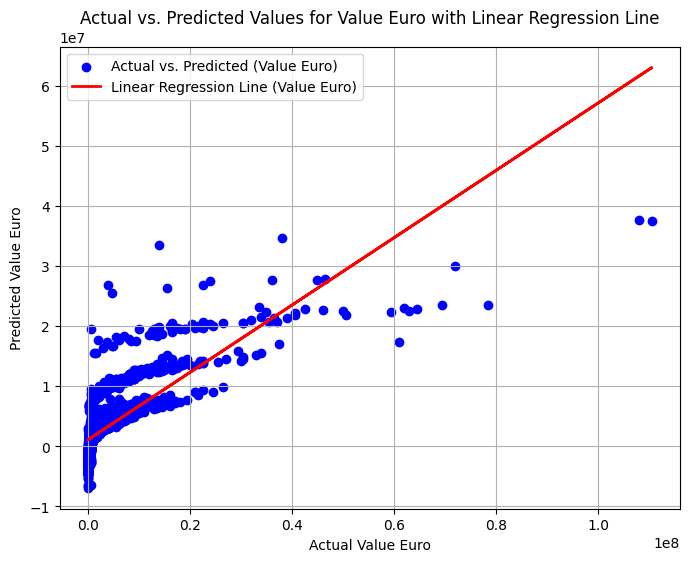

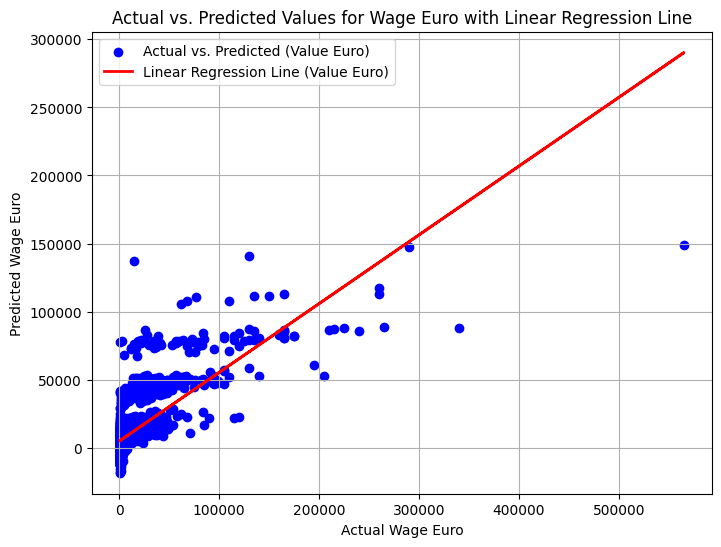

Results for value_euro:
  Linear Regressor: R² : 0.586812282471151

Results for wage_euro:
  Linear Regressor: R² : 0.5337659588463102



In [11]:
model_l = LinearRegression()

# Function to train and evaluate the Random Forest Regressor
def train_evaluate_linear(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        model_l.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = model_l.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2, label='Linear Regression Line (Value Euro)')
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro with Linear Regression Line')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2, label='Linear Regression Line (Value Euro)')
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro with Linear Regression Line')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate
linear_results = train_evaluate_linear(X_train, X_test, y_train, y_test)

# Viewing the results
for target in linear_results:
    print(f"Results for {target}:")
    print(f"  Linear Regressor: R² : {linear_results[target]['R²']}")
    print()

## 6. Decision Tree Regressor

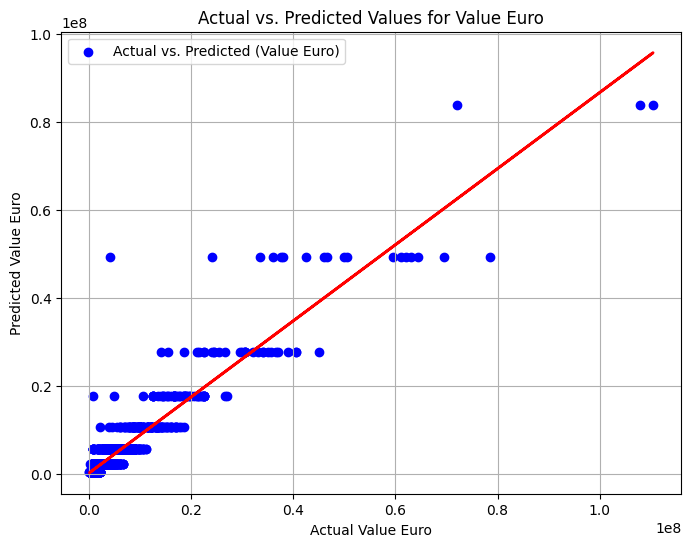

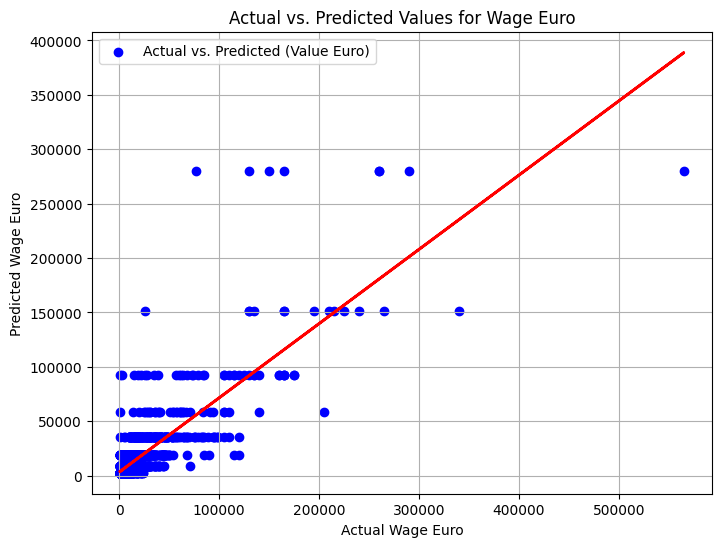

Results for value_euro:
 Decision Tree Regressor: R² : 0.8928373993163555

Results for wage_euro:
 Decision Tree Regressor: R² : 0.6724692421283708



In [12]:
# Model training and evaluation
model_DT = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_leaf=6)

def train_evaluate_DT(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        model_DT.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = model_DT.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate the Decision Tree
DT_results = train_evaluate_DT(X_train, X_test, y_train, y_test)

# Viewing the results
for target in DT_results:
    print(f"Results for {target}:")
    print(f" Decision Tree Regressor: R² : {DT_results[target]['R²']}")
    print()

Plotting the decision tree

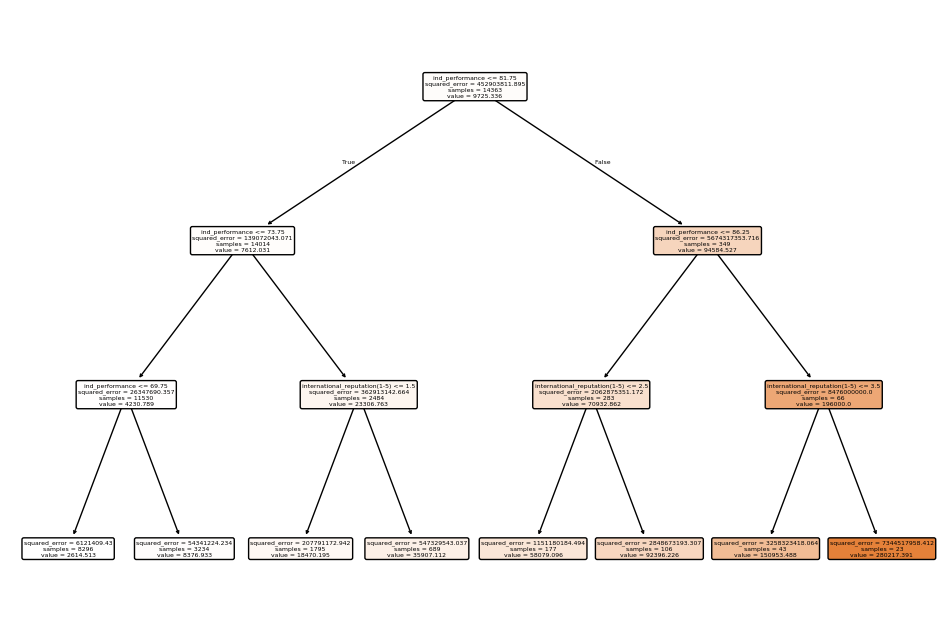

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model_DT, filled=True, feature_names=features, rounded=True)
plt.show()


## 7. Gradient Booster

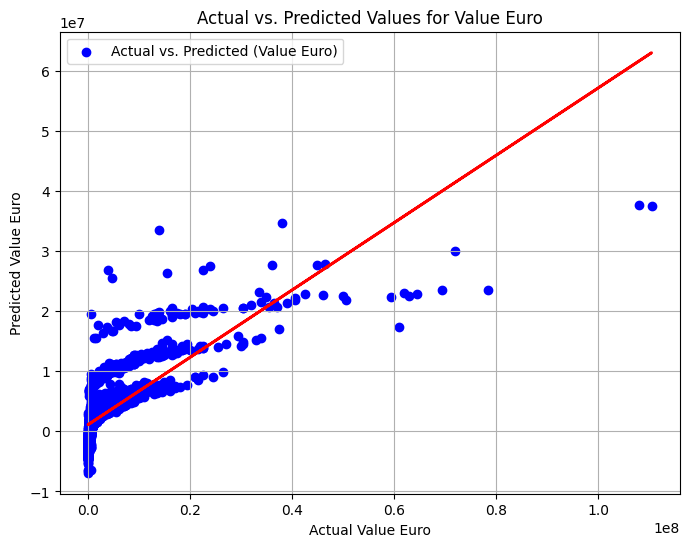

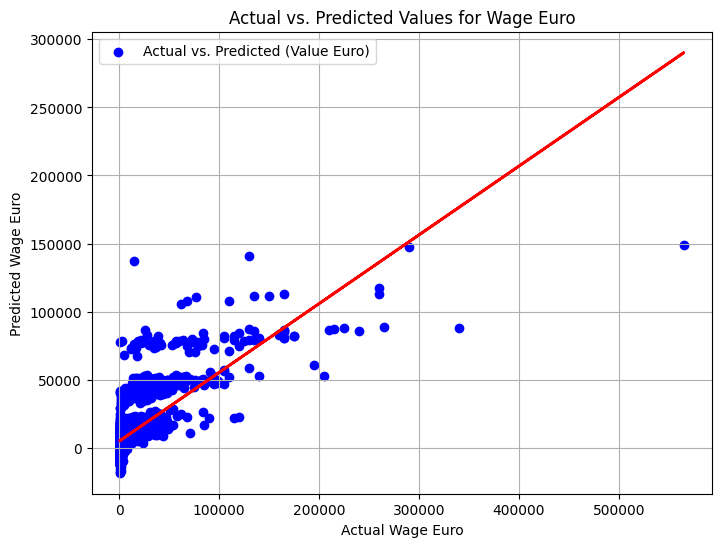

Results for value_euro:
 Lasso Regressor: R² : 0.586812282429777

Results for wage_euro:
 Lasso Regressor: R² : 0.5337659518642983



In [14]:
# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Lasso model
model_lasso = Lasso(alpha=0.001)  # You can adjust the alpha parameter for regularization strength
def train_evaluate_lasso(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        model_lasso.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = model_lasso.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate the Decision Tree
lasso_results = train_evaluate_lasso(X_train, X_test, y_train, y_test)

# Viewing the results
for target in lasso_results:
    print(f"Results for {target}:")
    print(f" Lasso Regressor: R² : {lasso_results[target]['R²']}")
    print()

to optimize the value of R square, we are going to use Ensemble Methods. We're using Gradeint booster regression to optimise the model with same

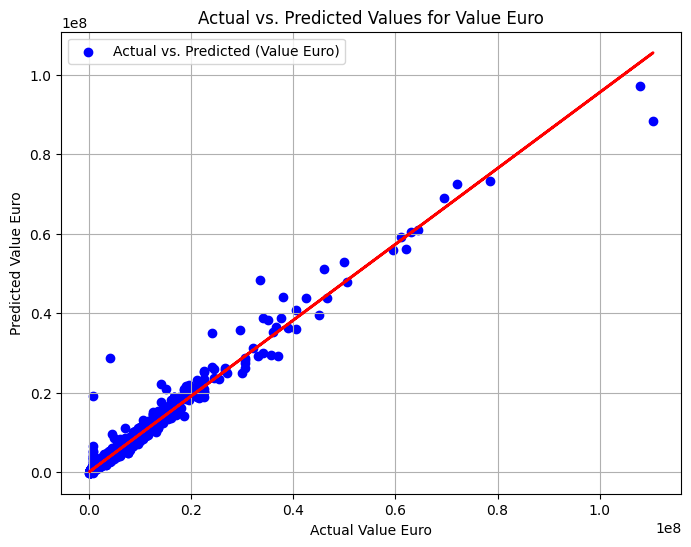

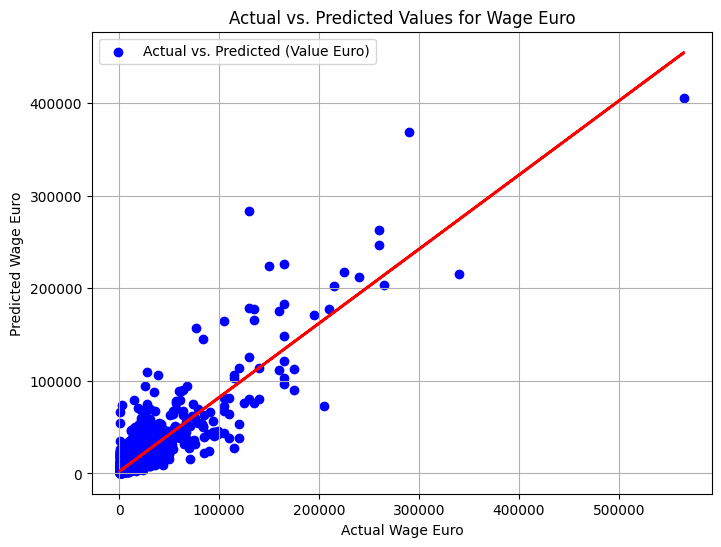

Results for value_euro:
 Gradient Boosting Regressor: R² : 0.973514890527145

Results for wage_euro:
 Gradient Boosting Regressor: R² : 0.7915135296498031



In [15]:
# Initialize Gradient Boosting regressor
gb_model = GradientBoostingRegressor()

def train_evaluate_gradient_boost(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        gb_model.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = gb_model.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate the Decision Tree
gb_results = train_evaluate_gradient_boost(X_train, X_test, y_train, y_test)

# Viewing the results
for target in gb_results:
    print(f"Results for {target}:")
    print(f" Gradient Boosting Regressor: R² : {gb_results[target]['R²']}")
    print()

## 8. XGBoost Implementation

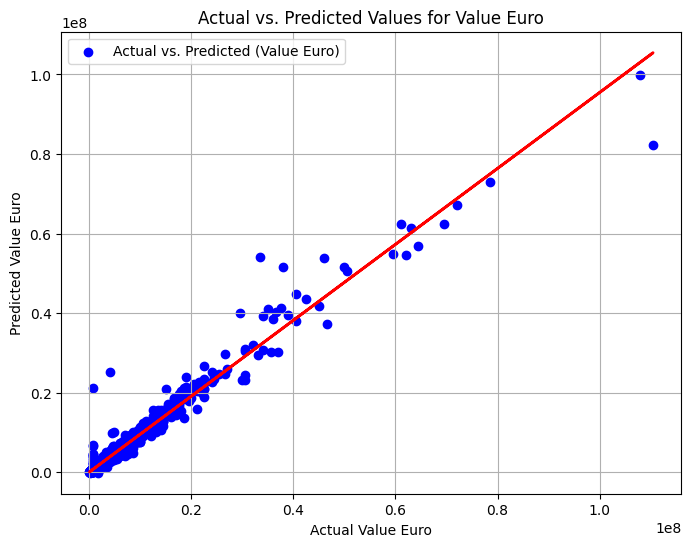

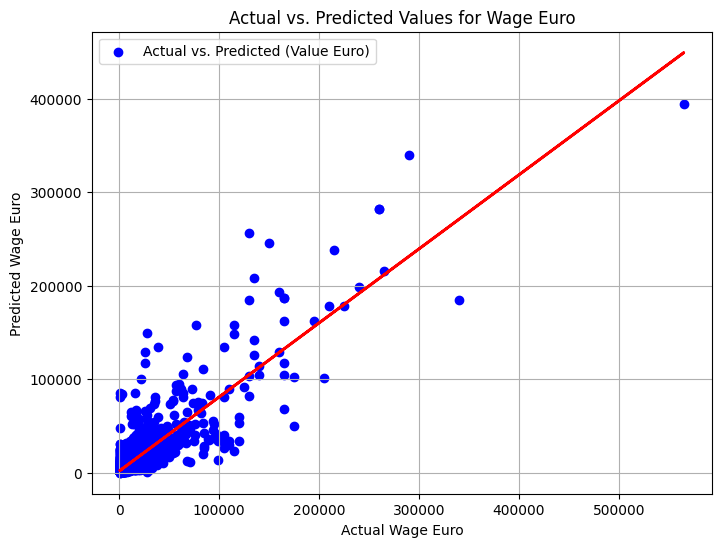

Results for value_euro:
 XGBoost Regressor: R² : 0.9681551761296813

Results for wage_euro:
 XGBoost Regressor: R² : 0.7421584753891862



In [16]:
# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

def train_evaluate_xgb(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        xgb_model.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = xgb_model.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate the XGBoost
xgb_results = train_evaluate_xgb(X_train, X_test, y_train, y_test)

# Viewing the results
for target in xgb_results:
    print(f"Results for {target}:")
    print(f" XGBoost Regressor: R² : {xgb_results[target]['R²']}")
    print()

## 10. Random Forest

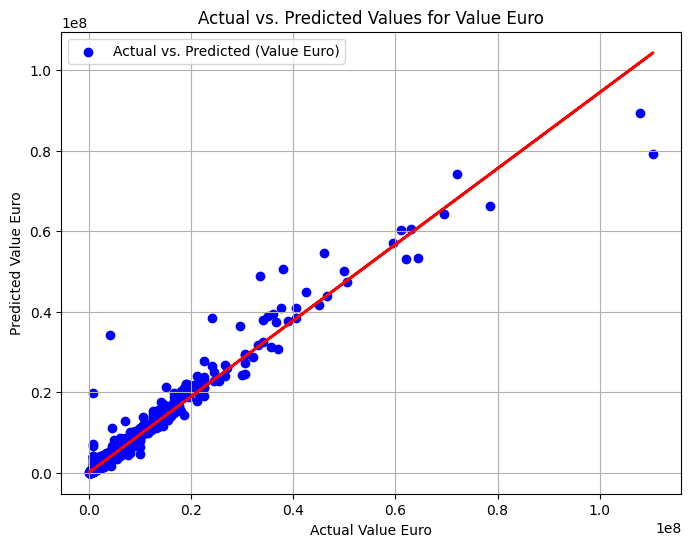

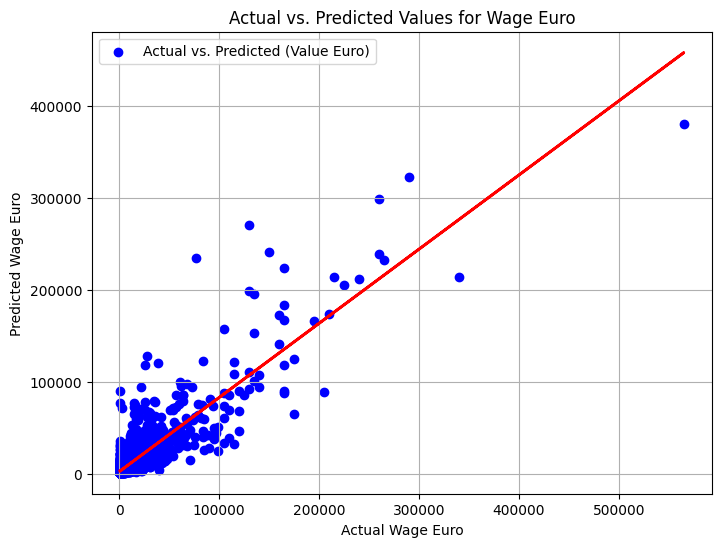

Results for value_euro:
  Random Forest Regressor: R² : 0.9621234543533738

Results for wage_euro:
  Random Forest Regressor: R² : 0.7605358815916319



In [17]:
# Creating the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Function to train and evaluate the Random Forest Regressor
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        rf_regressor.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = rf_regressor.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

        if target == 'value_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Value Euro')
            plt.ylabel('Predicted Value Euro')
            plt.title('Actual vs. Predicted Values for Value Euro')
            plt.legend()
            plt.grid(True)
            plt.show()
        if target == 'wage_euro':
            plt.figure(figsize=(8, 6))
            plt.scatter(y_test[target], y_pred, color='blue', label='Actual vs. Predicted (Value Euro)')
            linear_reg_value = LinearRegression()
            linear_reg_value.fit(y_test[[target]], y_pred)
            plt.plot(y_test[target], linear_reg_value.predict(y_test[[target]]), color='red', linewidth=2)
            plt.xlabel('Actual Wage Euro')
            plt.ylabel('Predicted Wage Euro')
            plt.title('Actual vs. Predicted Values for Wage Euro')
            plt.legend()
            plt.grid(True)
            plt.show()

    return results

# Train and evaluate the Random Forest Regressor
rf_results = train_evaluate_rf(X_train, X_test, y_train, y_test)

# Viewing the results
for target in rf_results:
    print(f"Results for {target}:")
    print(f"  Random Forest Regressor: R² : {rf_results[target]['R²']}")
    print()

Feature Importances for Random Forest Model

In [19]:
# Feature importance from the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train['value_euro'])  # Example for 'value_euro' target

# Extracting feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

!pip install plotly
# Plotting feature importances
import plotly.express as px
fig_importance = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances for Market Value Prediction')
fig_importance.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 44.8 MB/s eta 0:00:00 0:00:02

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [20]:
# Feature importance from the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train['wage_euro'])  # Example for 'value_euro' target

# Extracting feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sorting the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
import plotly.express as px
fig_importance = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importances for Wage Value Prediction')
fig_importance.show()

## 11. SVR Algorithm

In [21]:
svr = SVR()

# Function to train and evaluate the SVR model
def train_evaluate_svr(X_train, X_test, y_train, y_test):
    results = {}
    for target in y_train.columns:
        # Training the model on one target at a time
        svr.fit(X_train, y_train[target])

        # Predicting on the test set
        y_pred = svr.predict(X_test)

        # Evaluating the model
        r2 = r2_score(y_test[target], y_pred)  # Calculate R²

        # Storing results
        results[target] = {'R²': r2}

    return results

# Train and evaluate the SVR model
svr_results = train_evaluate_svr(X_train, X_test, y_train, y_test)

# Viewing the results
for target in svr_results:
    print(f"Results for {target}:")
    print(f"  SVR: R² : {svr_results[target]['R²']}")
    print()

Results for value_euro:
  SVR: R² : -0.08865195753812194

Results for wage_euro:
  SVR: R² : -0.07512848099008673



plotting SVR

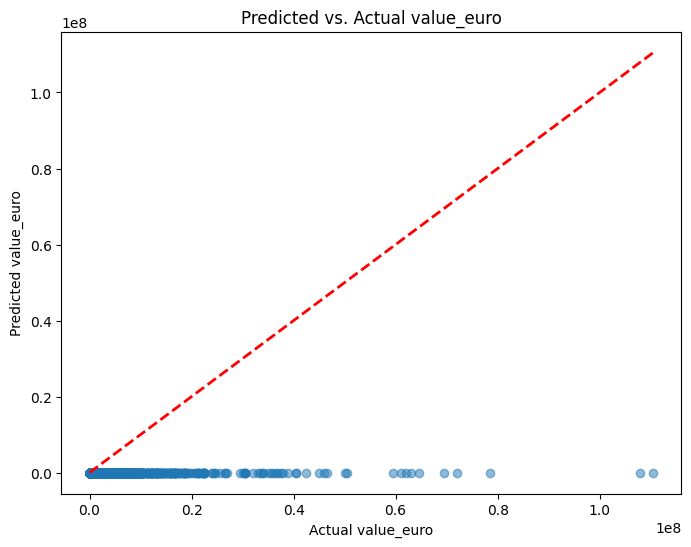

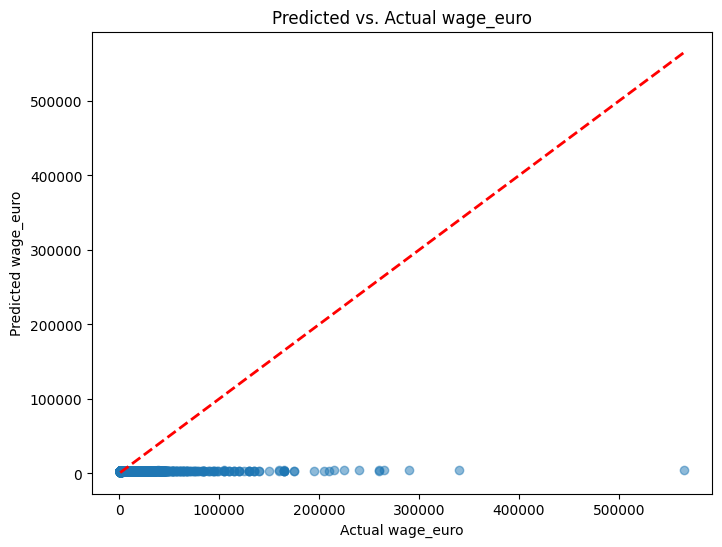

In [22]:
# Plot for value_euro
plt.figure(figsize=(8, 6))
plt.scatter(y_test['value_euro'], svr.predict(X_test), alpha=0.5)
plt.plot([y_test['value_euro'].min(), y_test['value_euro'].max()], [y_test['value_euro'].min(), y_test['value_euro'].max()], 'r--', lw=2)
plt.xlabel('Actual value_euro')
plt.ylabel('Predicted value_euro')
plt.title('Predicted vs. Actual value_euro')
plt.show()

# Plot for wage_euro
plt.figure(figsize=(8, 6))
plt.scatter(y_test['wage_euro'], svr.predict(X_test), alpha=0.5)
plt.plot([y_test['wage_euro'].min(), y_test['wage_euro'].max()], [y_test['wage_euro'].min(), y_test['wage_euro'].max()], 'r--', lw=2)
plt.xlabel('Actual wage_euro')
plt.ylabel('Predicted wage_euro')
plt.title('Predicted vs. Actual wage_euro')
plt.show()

## 12. Multi Layer Perceptron Regressor

In [23]:
from sklearn.neural_network import MLPRegressor

# Create the neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32),
                     activation='relu',
                     solver='adam',
                     max_iter=500,
                     random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_mlp = model.predict(X_test)
mse_value = np.mean((y_test['value_euro'] - y_pred_mlp[:, 0])**2)
mse_wage = np.mean((y_test['wage_euro'] - y_pred_mlp[:, 1])**2)

print(f'Mean Squared Error (value_euro): {mse_value:.2f}')
print(f'Mean Squared Error (wage_euro): {mse_wage:.2f}')


Mean Squared Error (value_euro): 28916496738267.62
Mean Squared Error (wage_euro): 477854503.51


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [24]:
from sklearn.metrics import explained_variance_score
print("The Variance Score :", explained_variance_score(y_test, y_pred_mlp))

The Variance Score : 0.20024415694454067
